<a href="https://colab.research.google.com/github/RMoulla/PYK_Strasbourg/blob/main/Classification_Churn_RL_Correction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Explication et prédiction du churn avec le machine learning

Ce TP vise à explorer et comparer différentes techniques de classification en machine learning pour expliquer et prédire le churn des clients. Le churn, ou l'attrition, est un indicateur clé pour de nombreuses entreprises ; il reflète le pourcentage de clients qui cessent d'utiliser un service sur une période donnée. Comprendre et prédire efficacement le churn peut aider les entreprises à mettre en œuvre des stratégies de rétention ciblées et à améliorer la satisfaction client.

## Le Dataset

Le dataset utilisé dans ce tutoriel contient des données sur les clients d'une entreprise, avec plusieurs caractéristiques qui pourraient influencer leur décision de rester ou de partir.

Ci-dessous un aperçu des variables incluses dans le dataset :

**Names** : Nom du client.

**Age** : Âge du client.

**Total_Purchase** : Montant total des achats effectués par le client.

**Account_Manager** : Indique si un gestionnaire de compte est assigné au client (1) ou non (0).

**Years** : Nombre d'années pendant lesquelles le client est avec l'entreprise.

**Num_Sites** : Nombre de sites utilisés par le client.

Onboard_date: Date à laquelle le client a été acquis.

**Location** : Emplacement du client.

**Company** : Nom de l'entreprise du client.

**Churn** : Indique si le client a churné (1) ou non (0).

## Objectifs Spécifiques du TP

**Exploration de Données** : Comprendre la distribution des données, la corrélation entre les variables et le taux de churn.

**Prétraitement des Données** : Nettoyer et préparer les données pour la modélisation, y compris le traitement des variables catégorielles et la division des données en ensembles d'entraînement et de test.

**Modélisation** : Appliquer plusieurs modèles de classification, tels que la régression logistique, Random Forest et les SVM pour prédire le churn.

**Évaluation des Modèles** : Comparer les performances des modèles en utilisant des métriques telles que la précision, le rappel, l'accuracy, et l'AUC-ROC.

**Optimisation** : Effectuer une optimisation des hyperparamètres sur les modèles sélectionnés pour améliorer leurs performances.

**Interprétation** : Analyser les résultats pour identifier les facteurs clés influençant le churn et discuter des implications pour les stratégies de rétention des clients.

In [ ]:
import pandas as pd

dataset = pd.read_csv('customer_churn.csv')
dataset.head(10)

,Names,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Onboard_date,Location,Company,Churn
0,Cameron Williams,42.0,11066.80,0,7.22,8.0,2013-08-30 07:00:40,"10265 Elizabeth Mission Barkerburgh, AK 89518",Harvey LLC,1
1,Kevin Mueller,41.0,11916.22,0,6.50,11.0,2013-08-13 00:38:46,"6157 Frank Gardens Suite 019 Carloshaven, RI 1...",Wilson PLC,1
2,Eric Lozano,38.0,12884.75,0,6.67,12.0,2016-06-29 06:20:07,"1331 Keith Court Alyssahaven, DE 90114","Miller, Johnson and Wallace",1
3,Phillip White,42.0,8010.76,0,6.71,10.0,2014-04-22 12:43:12,"13120 Daniel Mount Angelabury, WY 30645-4695",Smith Inc,1
4,Cynthia Norton,37.0,9191.58,0,5.56,9.0,2016-01-19 15:31:15,"765 Tricia Row Karenshire, MH 71730",Love-Jones,1
5,Jessica Williams,48.0,10356.02,0,5.12,8.0,2009-03-03 23:13:37,"6187 Olson Mountains East Vincentborough, PR 7...",Kelly-Warren,1
6,Eric Butler,44.0,11331.58,1,5.23,11.0,2016-12-05 03:35:43,"4846 Savannah Road West Justin, IA 87713-3460",Reynolds-Sheppard,1
7,Zachary Walsh,32.0,9885.12,1,6.92,9.0,2006-03-09 14:50:20,"25271 Roy Expressway Suite 147 Brownport, FM 5...",Singh-Cole,1
8,Ashlee Carr,43.0,14062.60,1,5.46,11.0,2011-09-29 05:47:23,"3725 Caroline Stravenue South Christineview, M...",Lopez PLC,1
9,Jennifer Lynch,40.0,8066.94,1,7.11,11.0,2006-03-28 15:42:45,"363 Sandra Lodge Suite 144 South Ann, WI 51655...",Reed-Martinez,1


## Analyse exploratoire des données

Nous allons commencer par une analyse exploratoire des données. Cette phase vise à comprendre les données, leur distribution et les relations entre les variables, notamment entre les variables dépendantes (features) et la variable d'intérêt.

In [ ]:
# Quelques statistiques descriptives
print(dataset.describe())

              Age  Total_Purchase  Account_Manager       Years   Num_Sites  \
count  900.000000      900.000000       900.000000  900.000000  900.000000   
mean    41.816667    10062.824033         0.481111    5.273156    8.587778   
std      6.127560     2408.644532         0.499921    1.274449    1.764836   
min     22.000000      100.000000         0.000000    1.000000    3.000000   
25%     38.000000     8497.122500         0.000000    4.450000    7.000000   
50%     42.000000    10045.870000         0.000000    5.215000    8.000000   
75%     46.000000    11760.105000         1.000000    6.110000   10.000000   
max     65.000000    18026.010000         1.000000    9.150000   14.000000   

            Churn  
count  900.000000  
mean     0.166667  
std      0.372885  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      0.000000  
max      1.000000  


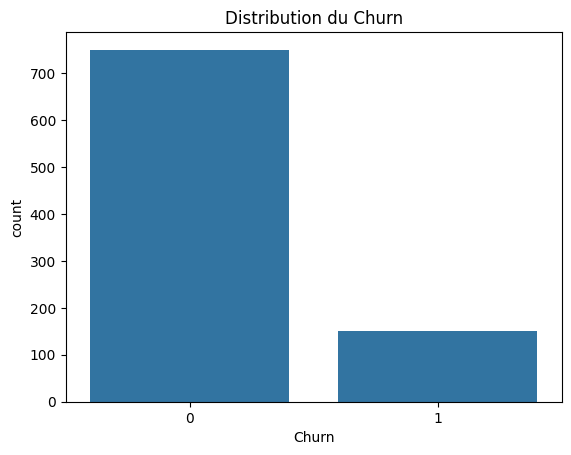

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution de la variable Churn
sns.countplot(x='Churn', data=dataset)
plt.title('Distribution du Churn')
plt.show()

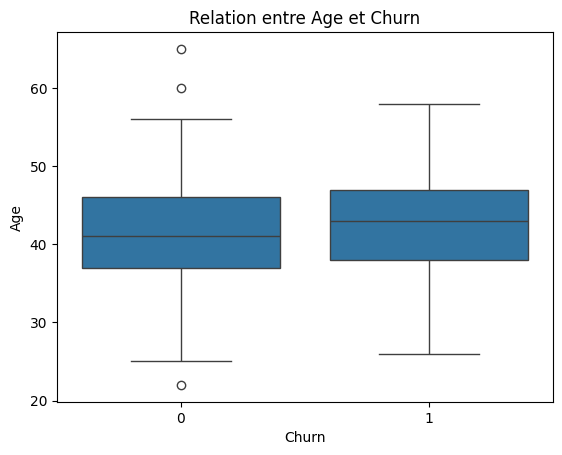

In [ ]:
# Relation entre Age et Churn
sns.boxplot(x='Churn', y='Age', data=dataset)
plt.title('Relation entre Age et Churn')
plt.show()

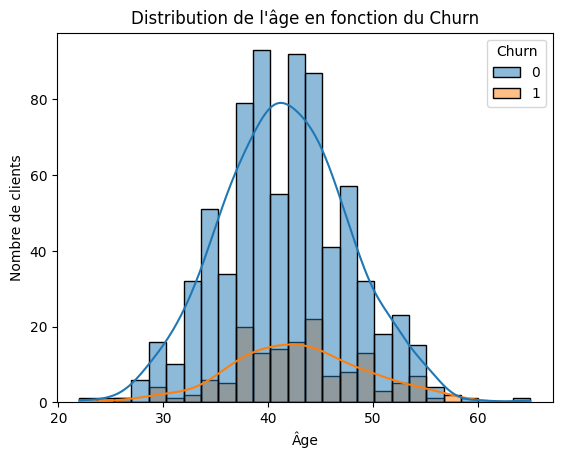

In [ ]:
# prompt: Visualiser la relation entre le churn et l'âge sous forme de distribution


# Distribution de l'âge pour les clients churnés et non churnés
sns.histplot(data=dataset, x='Age', hue='Churn', kde=True)
plt.title('Distribution de l\'âge en fonction du Churn')
plt.xlabel('Âge')
plt.ylabel('Nombre de clients')
plt.show()


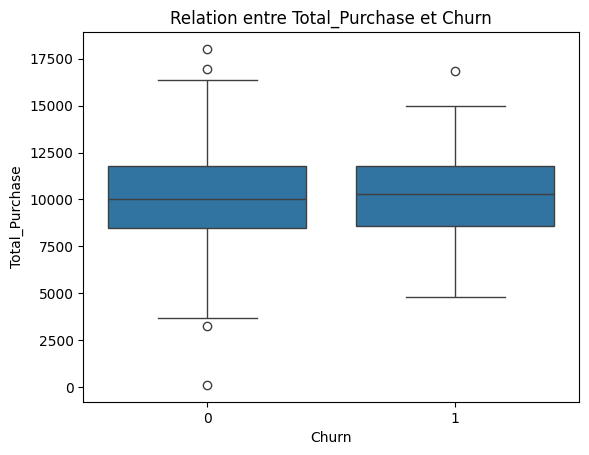

In [ ]:
# Relation entre Total Purchase et Churn
sns.boxplot(x='Churn', y='Total_Purchase', data=dataset)
plt.title('Relation entre Total_Purchase et Churn')
plt.show()

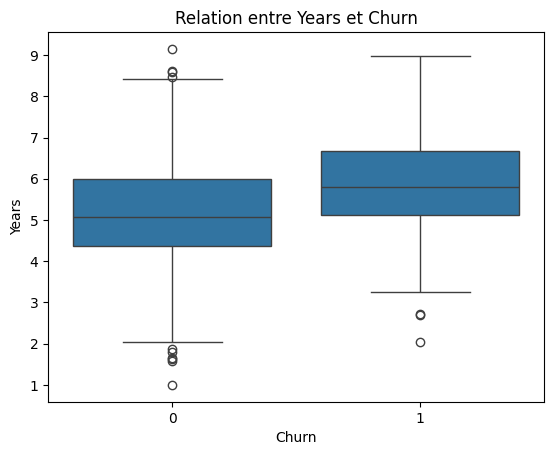

In [ ]:
# prompt: Visualiser la relation entre churn et Years


sns.boxplot(x='Churn', y='Years', data=dataset)
plt.title('Relation entre Years et Churn')
plt.show()




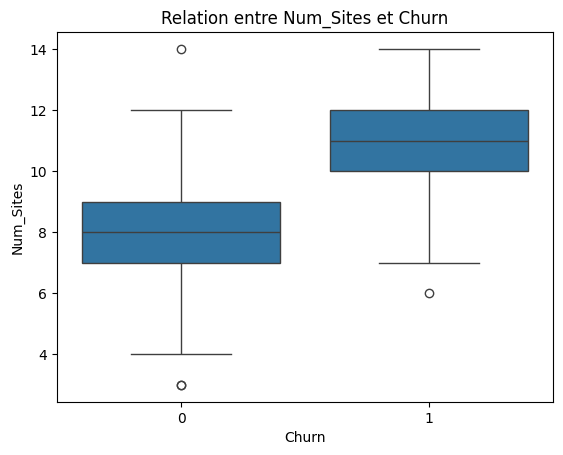

In [ ]:
# prompt: Visualiser la relation entre le churn et num_sites

import matplotlib.pyplot as plt
# Relation entre Num_Sites et Churn
sns.boxplot(x='Churn', y='Num_Sites', data=dataset)
plt.title('Relation entre Num_Sites et Churn')
plt.show()



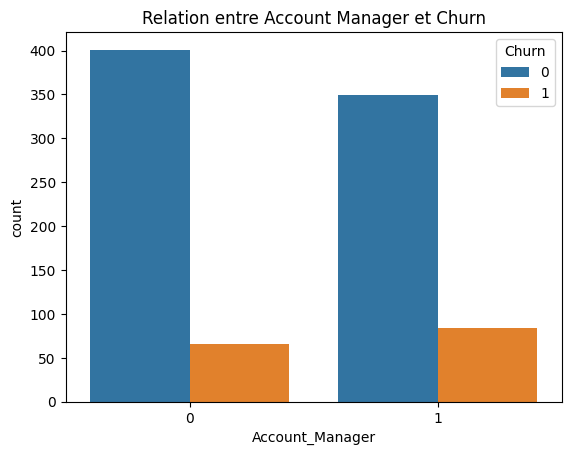

In [ ]:
# prompt: Visualiser la relation entre le churn et le Account Manager

import matplotlib.pyplot as plt
# Relation entre Account Manager et Churn
sns.countplot(x='Account_Manager', hue='Churn', data=dataset)
plt.title('Relation entre Account Manager et Churn')
plt.show()


## Modélisation

Dans cette phase, nous allons entraîner plusieurs modèles de classification, dont la régression logistique, Random Forest, et potentiellement et les SVM. Notre objectif est à la fois la compréhension des déterminants de churn et la prédiction de celui-ci.

Nous allons d'abord commencer par partionner notre dataset en jeu de données d'entraînement et jeu de données de test.

In [ ]:
from sklearn.model_selection import train_test_split

# Partionner le dataset en train et test

X = dataset.drop(['Churn', 'Names', 'Location', 'Onboard_date', 'Company'], axis=1)
y = dataset['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train

,Age,Total_Purchase,Account_Manager,Years,Num_Sites
10,30.0,11575.37,1,5.22,8.0
334,40.0,6773.23,1,4.29,11.0
244,37.0,15070.32,0,6.91,6.0
678,43.0,5907.07,0,5.89,8.0
306,46.0,11538.57,1,7.93,10.0
...,...,...,...,...,...
106,43.0,6715.23,0,4.16,8.0
270,44.0,9613.84,1,4.38,8.0
860,39.0,13731.45,1,8.15,10.0
435,36.0,12879.70,0,4.70,9.0


### Régression logistique

In [ ]:
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train)
log_reg = sm.Logit(y_train, X_train_sm).fit()
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.257054
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                  720
Model:                          Logit   Df Residuals:                      714
Method:                           MLE   Df Model:                            5
Date:                Mon, 24 Nov 2025   Pseudo R-squ.:                  0.4237
Time:                        16:22:40   Log-Likelihood:                -185.08
converged:                       True   LL-Null:                       -321.17
Covariance Type:            nonrobust   LLR p-value:                 9.559e-57
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             -19.1136      1.931     -9.896      0.000     -22.899     -15.328
Age           

In [ ]:
X_test_sm = sm.add_constant(X_test)
y_pred = log_reg.predict(X_test_sm)
y_pred

,0
70,0.397622
827,0.179830
231,0.019421
588,0.129233
39,0.671608
...,...
897,0.000186
578,0.901334
779,0.014015
25,0.457460


In [ ]:
# prompt: Calculer l'accuracy, le rappel, la précision et le F1

import numpy as np
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# Assuming y_test and y_pred are defined from your previous code
# Convert probabilities to binary predictions (e.g., threshold at 0.5)
y_pred_binary = (y_pred > 0.25).astype(int)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)

print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1-score: {f1}")


Accuracy: 0.9
Recall: 0.75
Precision: 0.7058823529411765
F1-score: 0.7272727272727273
